# 2.5: Visual Applications of Machine Learning

## Part 2: Radar Recognition

## Table of Content

[01. Import libraries](#01.-Import-libraries)

[02. Import Data](#02.-Import-Data)

[03. Setting Up Data Generators](#03.-Setting-Up-Data-Generators)

[04. Building and compiling the CNN Model](#04.-Building-and-compiling-the-CNN-Model)

## 01. Import libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


## 02. Import Data

In [54]:
#download the weather images and put them in a directory
path = r'E:\Careerfoundry course\Careerfoundry Course Old\Machine Learning with Python\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


## 03. Setting Up Data Generators

In [55]:
# This will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


## 04. Building and compiling the CNN Model

In [56]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [57]:
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.5161 - loss: 0.1334 - val_accuracy: 0.6389 - val_loss: 0.1052
Epoch 2/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.9167 - loss: 0.0947 - val_accuracy: 0.7500 - val_loss: 0.0760
Epoch 3/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.7443 - loss: 0.0921 - val_accuracy: 0.6528 - val_loss: 0.1356
Epoch 4/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.6667 - loss: 0.1287 - val_accuracy: 0.8750 - val_loss: 0.0678
Epoch 5/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 175ms/step - accuracy: 0.7073 - loss: 0.1067 - val_accuracy: 0.5833 - val_loss: 0.1397
Epoch 6/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.6667 - loss: 0.1471 - val_accuracy: 0.6250 - val_loss: 0.1174
Epoch 7/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - accuracy: 0.6891 - loss: 0.1111 - val_accuracy: 0.5509 - val_loss: 0.1591
Epoch 8/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.5833 - loss: 0.1412 - val_accuracy

In [58]:
results = pd.DataFrame(model.history.history)

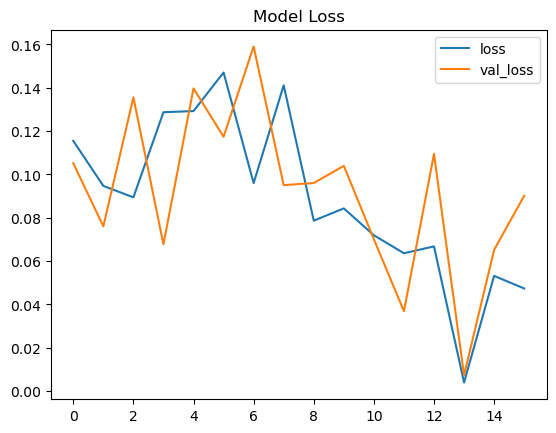

In [59]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

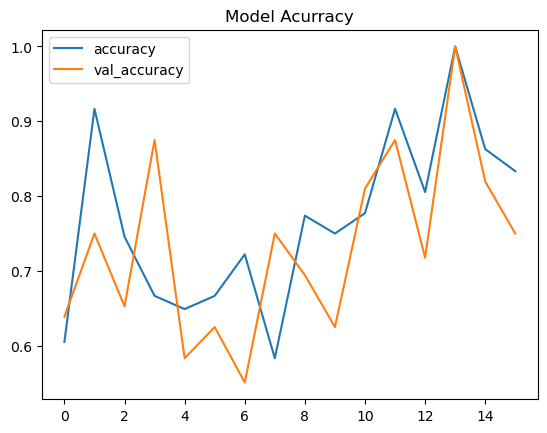

In [60]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [61]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.8333333134651184, Val_Accuracy: 0.75
Loss: 0.0473487563431263, Val_Loss: 0.09011425822973251


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


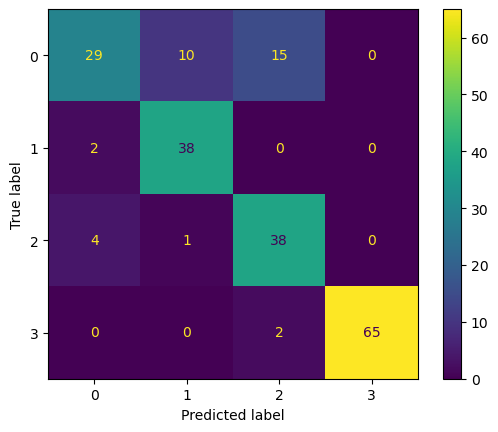

In [62]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [63]:
# This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


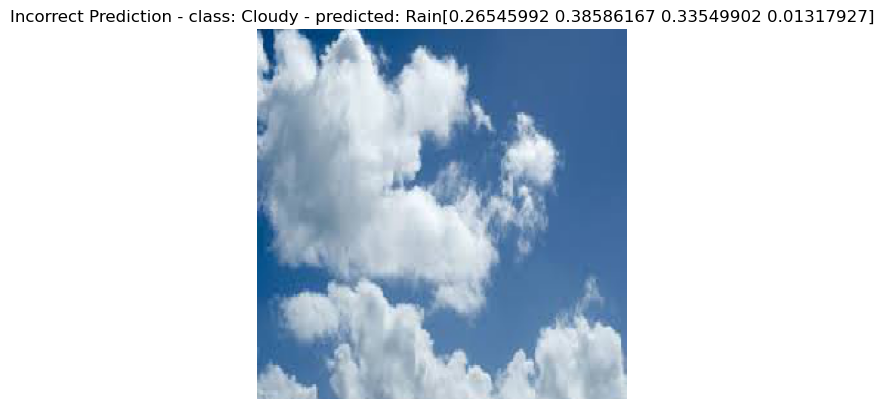

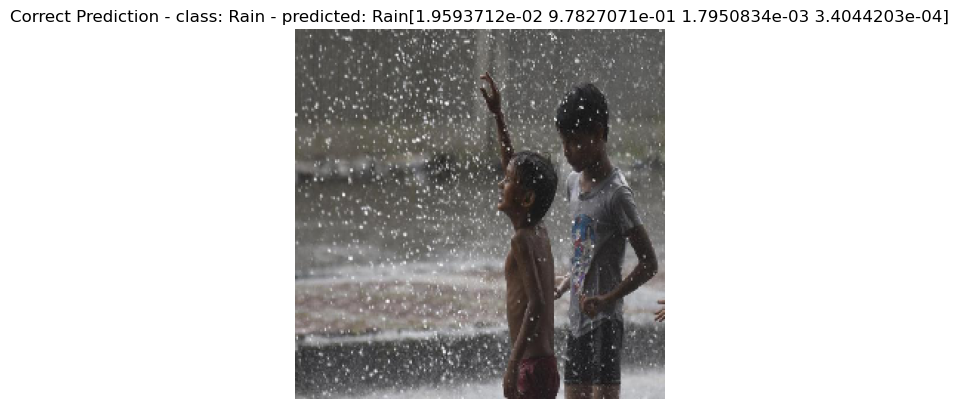

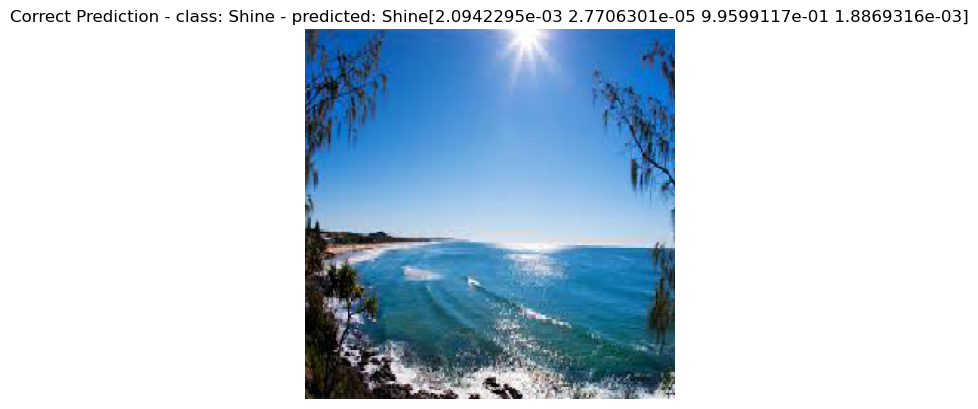

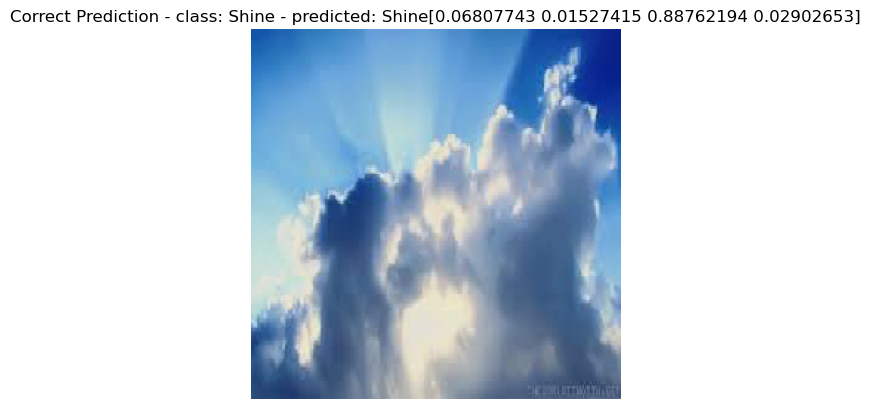

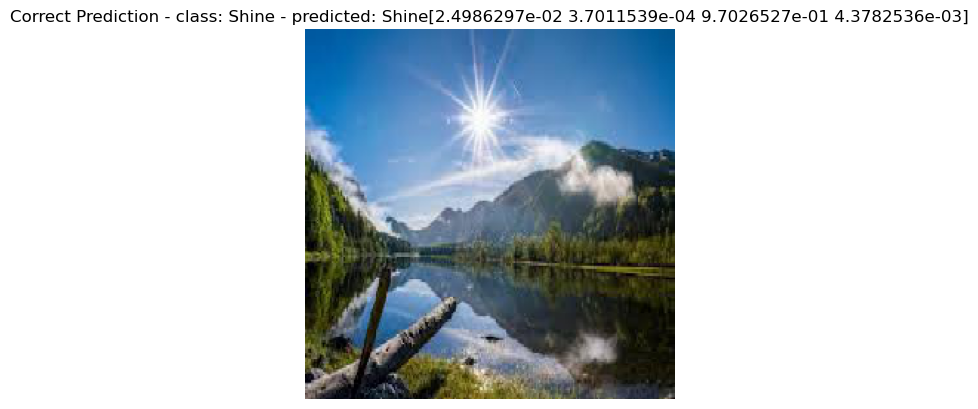

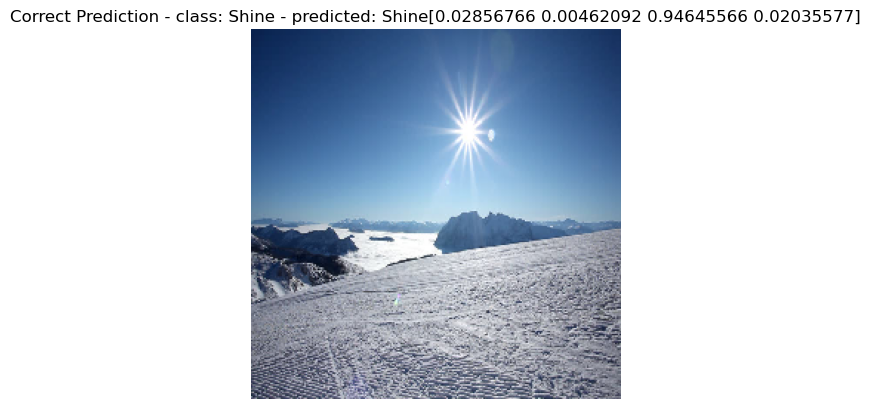

In [64]:
predict_one(model, 6) #<--you can show multiple pictures with this command. Just fill in the number you want to see.